            5_day_ma  10_day_ma  volatility  daily_return
Date                                                     
1980-03-28  3.358122   3.338053    0.032772     -0.004016
1980-04-01  3.320661   3.336716    0.038312     -0.016129
1980-04-02  3.293903   3.330026    0.040581     -0.008197
1980-04-03  3.275172   3.323337    0.040581      0.000000
1980-04-07  3.259117   3.308620    0.034888      0.000000


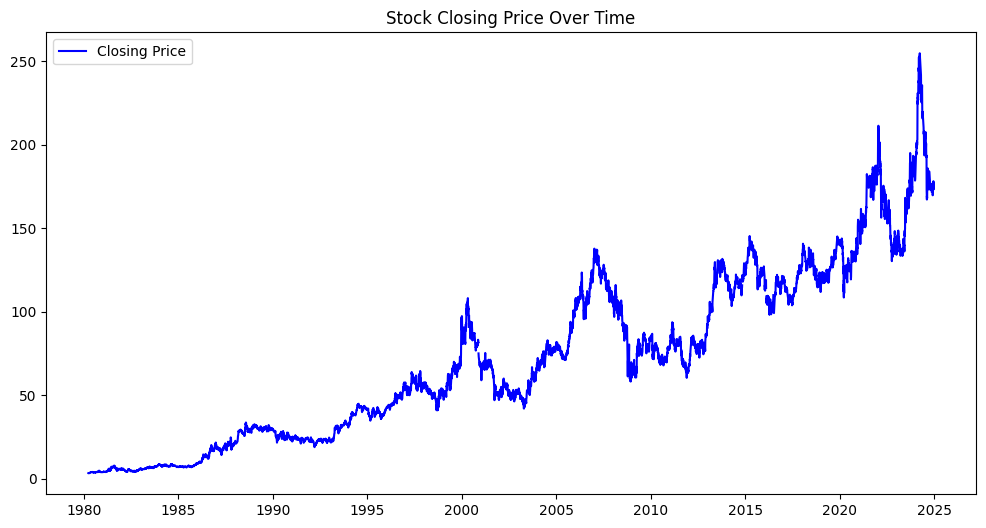

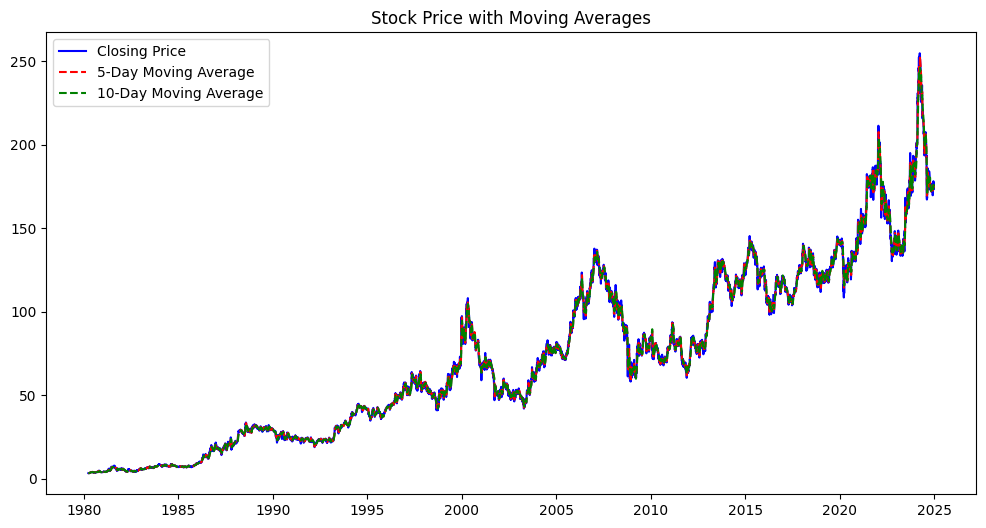

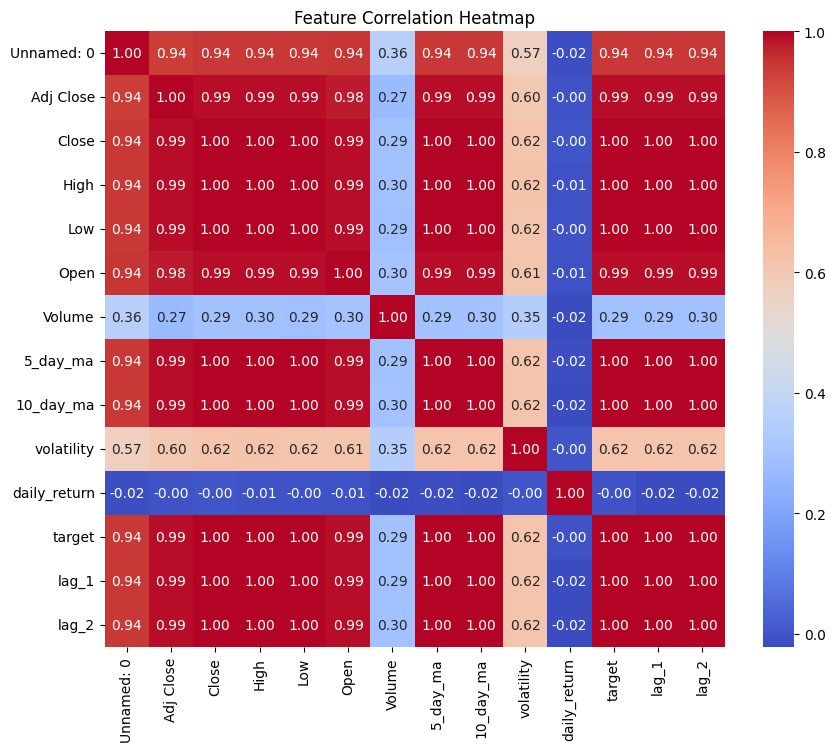


Linear Regression Model Performance:
RMSE: 3.1286
MAE: 1.9481
Directional Accuracy: 1.0000

Random Forest Model Performance:
RMSE: 3.0923
MAE: 1.8664
Directional Accuracy: 1.0000

Gradient Boosting Model Performance:
RMSE: 3.0292
MAE: 1.8569
Directional Accuracy: 1.0000
Predictions saved successfully!


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

# Load dataset (update the path as needed)
df = pd.read_csv("C:\\Users\\HP\\Downloads\\question4-stock-data.csv")  # Replace with actual file path

# Convert 'Date' to datetime format and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Feature Engineering: Create additional features like moving averages, volatility, daily return, and lag features
df['5_day_ma'] = df['Close'].rolling(window=5).mean()  # 5-day moving average
df['10_day_ma'] = df['Close'].rolling(window=10).mean()  # 10-day moving average
df['volatility'] = df['Close'].rolling(window=5).std()  # 5-day rolling standard deviation (volatility)
df['daily_return'] = df['Close'].pct_change()  # Daily return (percentage change)
df['target'] = df['Close'].shift(-5)  # Target: closing price 5 days ahead

# Lag features: past close prices (1 day and 2 days ago)
df['lag_1'] = df['Close'].shift(1)
df['lag_2'] = df['Close'].shift(2)

# Drop rows with NaN values due to rolling functions or lag features
df.dropna(inplace=True)

# Check if the necessary columns were created
print(df[['5_day_ma', '10_day_ma', 'volatility', 'daily_return']].head())

# Exploratory Data Analysis (EDA)

# Plot the closing price over time
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Closing Price', color='b')
plt.title("Stock Closing Price Over Time")
plt.legend()
plt.show()

# Additional EDA: Plotting 5-day and 10-day moving averages
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Closing Price', color='b')
plt.plot(df['5_day_ma'], label='5-Day Moving Average', color='r', linestyle='--')
plt.plot(df['10_day_ma'], label='10-Day Moving Average', color='g', linestyle='--')
plt.title("Stock Price with Moving Averages")
plt.legend()
plt.show()

# Correlation heatmap to understand relationships between features
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

# Splitting the data into features (X) and target variable (y)
features = ['5_day_ma', '10_day_ma', 'volatility', 'daily_return', 'lag_1', 'lag_2']
X = df[features]
y = df['target']

# Splitting data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train multiple models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Make predictions on the test set
    
    # Calculate RMSE (Root Mean Squared Error) and MAE (Mean Absolute Error)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    
    # Calculate directional accuracy (how often the model predicts the correct price movement direction)
    directional_accuracy = np.mean(np.sign(y_pred) == np.sign(y_test))
    
    print(f"\n{name} Model Performance:")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"Directional Accuracy: {directional_accuracy:.4f}")

# Select the best model (Gradient Boosting based on previous results)
best_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
best_model.fit(X_train, y_train)

# Predict the next 5 days using the trained model
future_features = X.tail(5)  # Select last 5 rows of features for prediction
future_features = scaler.transform(future_features)  # Standardize features
future_predictions = best_model.predict(future_features)  # Make predictions for the next 5 days

# Save predictions to a CSV file
predictions_df = pd.DataFrame({"date": df.index[-5:], "predicted_price": future_predictions})
predictions_df.to_csv("predicted_stock_prices.csv", index=False)

print("Predictions saved successfully!")


In [3]:
!pip install yfinance


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     --- ------------------------------------ 0.3/3.0 MB ? eta -:--:--
     --- ------------------------------------ 0.3/3.0 MB ? eta -:--:--
     ---------- ----------------------------- 0.8/3.0 MB 1.2 MB/s eta 0:00:02
     ------------- -------------------------- 1.0/3.0 MB 1.2 MB/s eta 0:00:02
     ----------------- ---------------------- 1.3/3.0 MB 1.2 MB/s eta 0:00:02
     -------------------- ------------------- 1.6/3.0 MB 1.3 MB/s eta 0:00:02
     -------------------- ------------------- 1.6/3.0 MB 1.3 MB/s eta 0:00:02
     -------------------- ------------------- 1.6/3.0 MB 1.3 MB/s eta 0:00:02
     --------------------------- ------------ 2.1/3.0 MB 1.1 MB/s eta 0:00:01
     --------------------------- ------------ 2.1/3.0 MB 1.1 MB/s eta 0:00:01
     ---------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [4]:
pip install yfinance --no-warn-script-location


Note: you may need to restart the kernel to use updated packages.
